In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinv,null_space
from RateDistortion import *
from ProgressBar import ProgressBar

In [2]:
# parameters
R = np.array([[2,0.5],[0.5,2]])
px = np.array([0.5,0.5])

s3 = np.array([[1,0],[0,1]])
s4 = np.array([[0.5,0.5]])

In [3]:
# get the rate-distortion function
d = getFullDistortionFunction(R,s3)
result = getRD(px,d,numPoints=1000)

d2 = getFullDistortionFunction(R,s4)
result2 = getRD(px,d2,numPoints=1000)

# line for the bound
dmin = -1
dmax = 1

Qinv = np.diag(inv(R) @ np.ones(np.shape(R)[0]))
Q = inv(Qinv)

L = getAvgLambdaStar(Q,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

# point of equality
T = getT(R,s3)
#T = np.array([[Tv[0],Tv[2]],[Tv[1],Tv[3]]])
py = px @ inv(T)
pxy = np.diag(py) @ T
Dstar = np.sum(pxy * d)
Rstar = hx(px) - Dstar - L

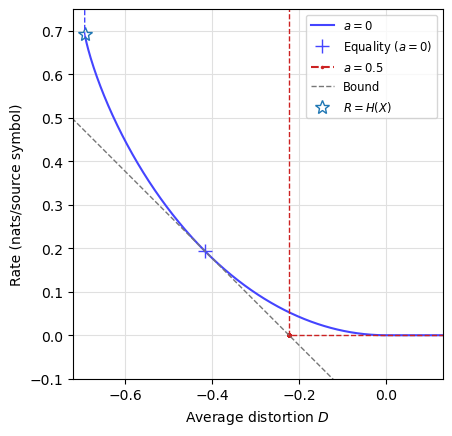

In [4]:
# this plot depends on the specific parameter values provided above
# and might not look right if the parameter values are changed

# first subplot

# plots R(D) and corresponding point of equality
plt.plot(result['Dmax_v'],result['r_v'],
         color='#4444ff',linestyle='-',marker='',markersize=3,label='$a = 0$')
plt.plot([Dstar],[Rstar],marker='+',markersize=10,
         color='#4444ff',linestyle='None',label='Equality ($a=0$)')

plt.plot(result2['Dmax_v'],result2['r_v'],
         color='#cc2222',linestyle='--',marker='.',markersize=3,label='$a = 0.5$')
plt.plot([result2['Dmax_v'][0],result2['Dmax_v'][0],1],
         [1,result2['r_v'][0],result2['r_v'][0]],linestyle='--',color='#cc2222',linewidth=1)


# plots the bound line
plt.plot(D_v,B_v,color='#777777',linewidth=1,linestyle='--',label='Bound')

plt.axis([-0.72,0.13,-0.1,0.75])
plt.gca().set_xlabel('Average distortion $D$')
plt.gca().set_ylabel('Rate (nats/source symbol)')
#ax[0].set_xticks([-0.35,-0.3,-0.25,-0.2])

plt.plot([-1*np.log(2)],[np.log(2)],marker='*',mfc='none',markersize=10,linestyle='',
        label='$R = H(X)$')
plt.plot([result['Dmax_v'][0],-1*np.log(2),-1*np.log(2)],
         [result['r_v'][0],np.log(2),1],linestyle='--',color='#4444ff',linewidth=1)
# mfc = marker face color

plt.legend(fontsize='small')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.gca().grid(visible=True,color='#e0e0e0')


plt.savefig('Figure3.pdf',bbox_inches='tight')